# Generate plots
Run this notebook to generate used plots

In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
import matplotlib.pyplot as plt
import sys
sys.path.append('../fpgp')
import plotting_tools
import utils
import numpy as np
import os

# Bachelor thesis plots

In [3]:
def means(arr):
    q = np.quantile(arr, 0.9, axis=0)
    vals = []
    for i in range(arr.shape[1]):
        col = arr[:, i]
        vals.append(np.mean(col))
    vals = np.array(vals)
    return vals, np.zeros_like(vals)

def medians(arr):
    q = np.quantile(arr, 0.9, axis=0)
    vals = []
    for i in range(arr.shape[1]):
        col = arr[:, i]
        vals.append(np.median(col))
    vals = np.array(vals)
    return vals, np.zeros_like(vals)

def meansof90(arr):
    q = np.quantile(arr, 0.9, axis=0)
    vals = []
    for i in range(arr.shape[1]):
        col = arr[:, i]
        vals.append(np.mean(col[col < q[i]]))
    vals = np.array(vals)
    return vals, np.zeros_like(vals)
def reorder(arr, idxs):
    ret = []
    for i in idxs:
        ret.append(arr[i])
    return ret

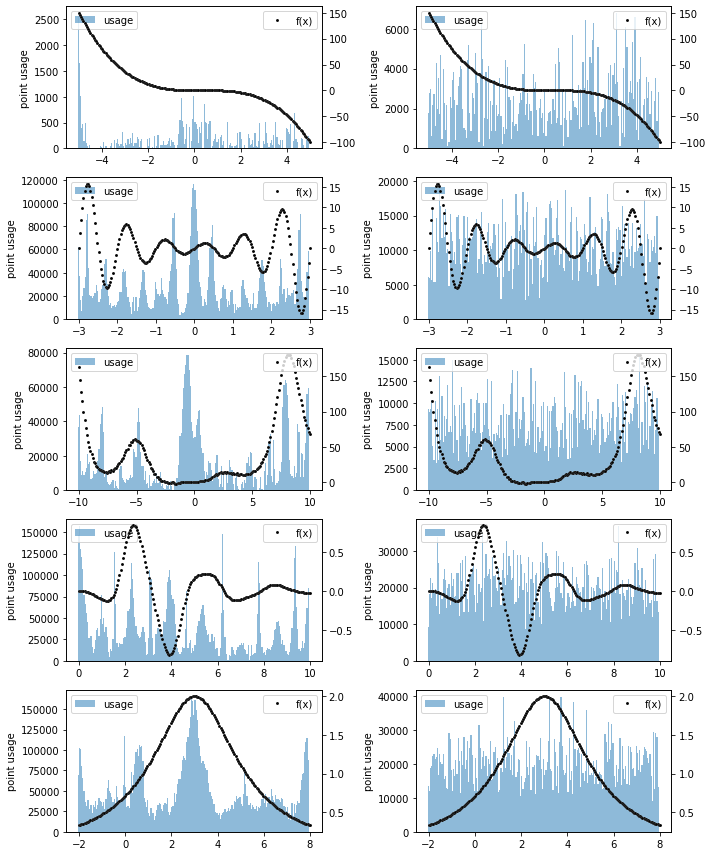

In [39]:
base_path = '../data'
paths = ('001_fitness/f1', '05_fitness/f2', '15_fitness/f3', '0025_fitness/f4', '0025_fitness/f5')
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 12))
for p, row in zip(paths, axs):
    logs, names = utils.get_results(os.path.join(base_path, p))
    data = np.load(os.path.join(base_path, p, 'my2', 'dataset.npz'))
    trn_x, trn_y = data['trn'][:, :-1], data['trn'][:, -1]
    plotting_tools.predictor_histogram(trn_x, trn_y, logs[names.index('my2')], ax1=row[0])
    plotting_tools.predictor_histogram(trn_x, trn_y, logs[names.index('DScoev')], ax1=row[1])
plt.tight_layout()
#plt.show()
plt.savefig('../plots/pred_hist.pdf')
#print(names)

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2)
for ax, i in zip((a for row in axs for a in row), range(1, 6)):
    if i == 1:
        x=np.linspace(-5, 5, 200)
        y=1.5*(x**2)-x**3
        ax.plot(x,y)
        ax.set_title(f'$f_{i}$')
        continue
    data = np.load('../datasets/f' + str(i) + '.npz')
    ax.plot(data['trn'][:, :-1], data['trn'][:, -1])
    ax.set_title(f'$f_{i}$')
fig.subplots_adjust(hspace=0.3)
fig.set_size_inches(10, 10)
fig.delaxes(axs[2][1])
plt.savefig('../plots/used_functions.pdf')

In [4]:
exp_dir = '../data/1e7_evals/'
benchmarks = sorted([os.path.join(exp_dir, d) for d in os.listdir(exp_dir)])
benchmarks

['../data/1e7_evals/f1',
 '../data/1e7_evals/f2',
 '../data/1e7_evals/f3',
 '../data/1e7_evals/f4',
 '../data/1e7_evals/f5',
 '../data/1e7_evals/yachts']

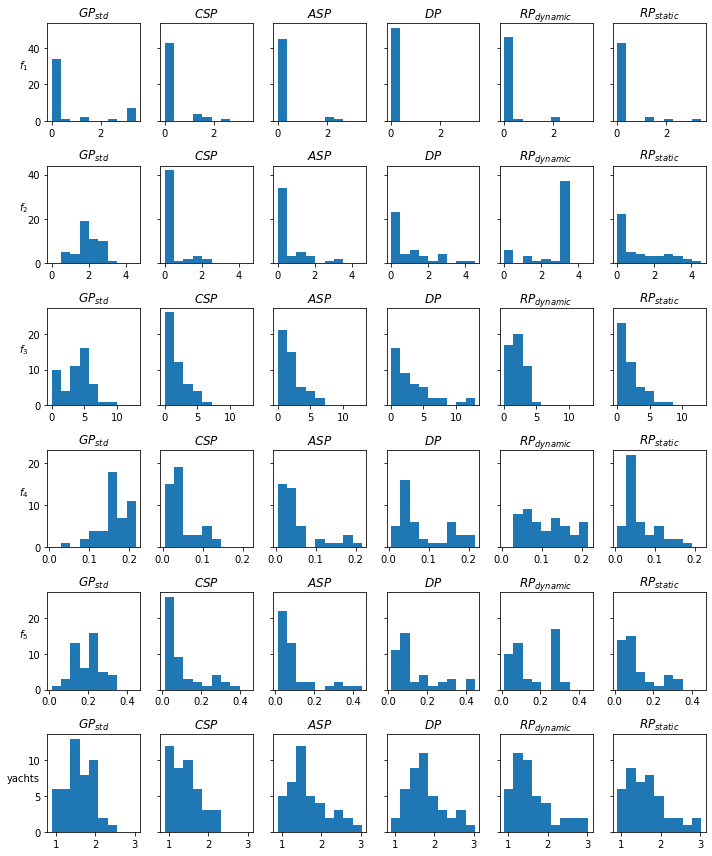

In [9]:
fig, axs = plt.subplots(nrows=len(benchmarks), ncols=6, sharey='row', figsize=(10, 12))
num_bins = 10
for row, b in zip(axs, benchmarks):
    title = os.path.basename(b)
    try:
        i = int(title[1])
        title = f'$f_{i}$'
    except:
        ...
    logs, names = utils.get_results(b)
    logs = reorder(logs, [1, 0, 2, 3, 4, 5])
    names = reorder(names, [1, 0, 2, 3, 4, 5])
    l_names = plotting_tools.names_to_latex(names)
    fs = []
    for ll in logs:
        fs.append(np.array([l['logbook'].select('test_set_f')[-1] for l in ll]))
    min_ = np.min(np.concatenate([f[f < np.quantile(f, 0.9)] for f in fs]))
    max_ = np.max(np.concatenate([f[f < np.quantile(f, 0.9)] for f in fs]))
    labelset = False
    for ax, n, f in zip(row, l_names, fs):
        if not labelset:
            ax.set_ylabel(title, rotation=0)
            labelset = True
        ax.hist(f, bins=np.linspace(min_, max_, num_bins))
        ax.set_title(n)
    
plt.tight_layout()
#plt.show()
plt.savefig('../plots/1e7evals_hist.pdf')
        

In [5]:
fmts = ['x-b','o-y','x-r','o-.c','^--g','^--m']
plot_kwargs = [{'fmt': x} for x in fmts]

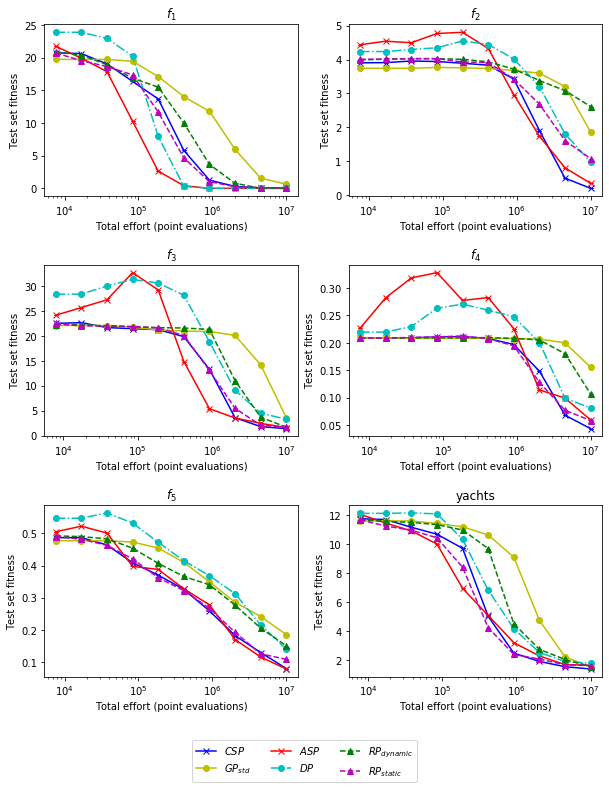

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
lines = []
for ax, b in zip((a for row in axs for a in row), benchmarks):
    logs, names = utils.get_results(b)
    title = os.path.basename(b)
    try:
        i = int(title[1])
        title = f'$f_{i}$'
    except:
        ...
    lines = plotting_tools.compare_performance(logs, 'evals', 'test_set_f',method_names=plotting_tools.names_to_latex(names), 
                                               ignore_tresh=np.inf, xlabel='Total effort (point evaluations)', 
                                               ylabel='Test set fitness', title=title, ax=ax, fig=fig, xscale='log', 
                                               vals_errors_func=meansof90, legend=False, plot_kwargs=plot_kwargs)

fig.legend(lines, plotting_tools.names_to_latex(names), loc=8, ncol=3)
fig.subplots_adjust(hspace=0.4)
plt.savefig('../plots/evals_meanof90_log.pdf')

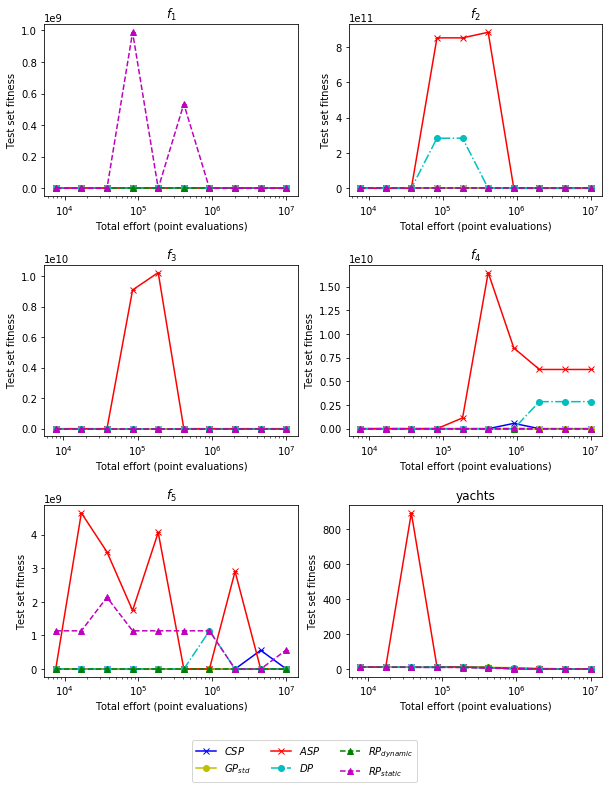

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
lines = []
for ax, b in zip((a for row in axs for a in row), benchmarks):
    logs, names = utils.get_results(b)
    title = os.path.basename(b)
    try:
        i = int(title[1])
        title = f'$f_{i}$'
    except:
        ...
    lines = plotting_tools.compare_performance(logs, 'evals', 'test_set_f',method_names=plotting_tools.names_to_latex(names), 
                                               ignore_tresh=np.inf, xlabel='Total effort (point evaluations)', 
                                               ylabel='Test set fitness', title=title, ax=ax, fig=fig, xscale='log', 
                                               vals_errors_func=means, legend=False, plot_kwargs=plot_kwargs)

fig.legend(lines, plotting_tools.names_to_latex(names), loc=8, ncol=3)
fig.subplots_adjust(hspace=0.4)
plt.savefig('../plots/evals_mean_log.pdf')

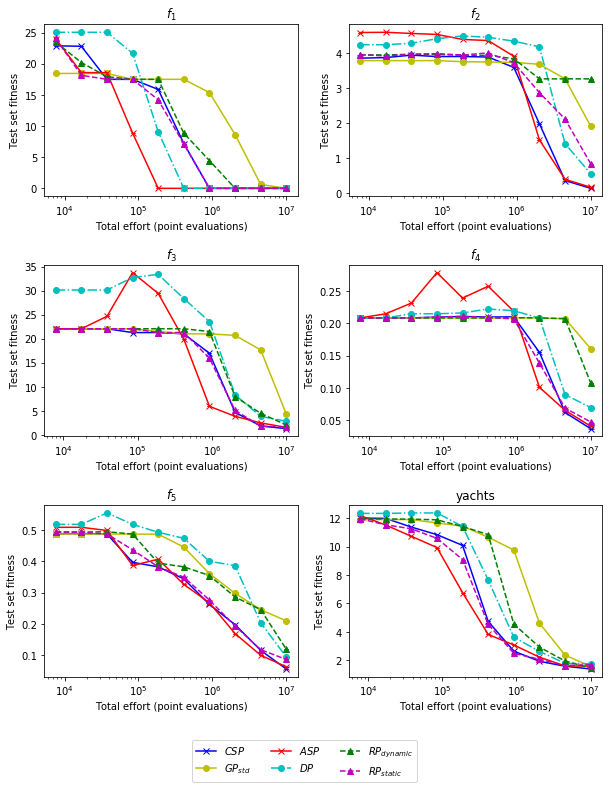

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
lines = []
for ax, b in zip((a for row in axs for a in row), benchmarks):
    logs, names = utils.get_results(b)
    title = os.path.basename(b)
    try:
        i = int(title[1])
        title = f'$f_{i}$'
    except:
        ...
    lines = plotting_tools.compare_performance(logs, 'evals', 'test_set_f',method_names=plotting_tools.names_to_latex(names), 
                                               ignore_tresh=np.inf, xlabel='Total effort (point evaluations)', 
                                               ylabel='Test set fitness', title=title, ax=ax, fig=fig, xscale='log', 
                                               vals_errors_func=medians, legend=False, plot_kwargs=plot_kwargs)

fig.legend(lines, plotting_tools.names_to_latex(names), loc=8, ncol=3)
fig.subplots_adjust(hspace=0.4)
plt.savefig('../plots/evals_median_log.pdf')